## Examining Webdataset

In [2]:
from urllib.parse import unquote
import webdataset as wds
import glob 
from bs4 import BeautifulSoup
import ftfy
from functools import lru_cache
import re
from pathlib import Path
import os
from matplotlib import pyplot as plt
from ffcv.loader import Loader
from ffcv.transforms import ToTensor
from ffcv.fields import JSONField
from ffcv.fields.decoders import IntDecoder, CenterCropRGBImageDecoder, BytesDecoder, NDArrayDecoder
from ffcv.pipeline.pipeline_spec import PipelineSpec
import numpy as np
import ftfy
import matplotlib.pyplot as plt


def preprocess_stuff(byte_string): 
    string = byte_string.decode('utf-8')
    string = re.sub('\s+', ' ', string)
    string = re.sub('[^\u0020-\u007E\u00A1-\u00AC\u00AE-\u00FF\u0100-\u0143][,]?', '', string)
    # strip foreign language 
    return ftfy.fix_text(string)

def map_func(data): 
    new_title = preprocess_stuff(data["title"])
    new_descr = preprocess_stuff(data["descr"])
    new_tags = preprocess_stuff(data["tags"]).replace(",", ", ")
    data["text"] = f"{new_title} {new_descr} {new_tags}"
    return data

def cleanup(string): 
    return BeautifulSoup(unquote(str(string)).replace("+", " "), features="html.parser").get_text()

In [ ]:
idx = 0
all_files = glob.glob("/mnt/cfs/datasets/yfcc100m_clip_subset/data/*.tar")
print(all_files)
ds = wds.WebDataset(all_files).decode('rgb').map(map_func).to_tuple("jpg text")

In [2]:
dset = iter(ds)

NameError: name 'ds' is not defined

In [ ]:
im, text = next(dset)
plt.figure()
plt.imshow(im)
print("text:", text)

In [ ]:
data.keys()

# Examining Webdataset Artifacts

In [ ]:
def load_shard_counts(outdir):
    try:
        with (outdir / 'finished_shards').open('rt', encoding='utf-8') as fp:
            return dict(line.strip().split(",") for line in fp)
    except FileNotFoundError:
        return dict()
dict_counts = load_shard_counts(Path("/mnt/cfs/datasets/yfcc100m_clip_subset/data"))

In [ ]:
def process_dict(kv_pair): 
    path, count = kv_pair
    fname = Path(path).name
    fpath = os.path.join("/mnt/cfs/datasets/yfcc100m_clip_subset/data/", fname)
    return (fpath, int(count))

In [ ]:
dict_counts = dict(map(process_dict, dict_counts.items()))
dict_counts = dict(filter(lambda kv: kv[1] != 0, dict_counts.items()))
len(dict_counts)

In [ ]:
sum(map(int, dict_counts.values()))

In [ ]:
my_shards = ["/mnt/cfs/datasets/yfcc100m_clip_subset/data/000.gz", 
             "/mnt/cfs/datasets/yfcc100m_clip_subset/data/001.gz", 
             "/mnt/cfs/datasets/yfcc100m_clip_subset/data/002.gz"]
lengths = [dict_counts[s] for s in my_shards]
print(lengths)

In [ ]:
14829396 - 14824987

In [ ]:
4409 / 14829396


In [ ]:
def bytes_to_unicode():
    bs = list(range(ord("!"), ord("~")+1))+list(range(ord("¡"), ord("¬")+1))+list(range(ord("®"), ord("ÿ")+1))
    cs = bs[:]
    n = 0
    for b in range(2**8):
        if b not in bs:
            bs.append(b)
            cs.append(2**8+n)
            n += 1
    cs = [chr(n) for n in cs]
    return dict(zip(cs, bs))

print(bytes_to_unicode().keys())

# Looking at webdataset

In [27]:
my_shards = ["/mnt/cfs/datasets/yfcc100m_clip_subset/data/001.tar", 
             "/mnt/cfs/datasets/yfcc100m_clip_subset/data/002.tar"]
ds = wds.WebDataset(my_shards).decode('rgb8').map(map_func).to_tuple("jpg title text")

In [28]:
dset = iter(ds)

RBOG_A Turning the sod in the location of a new raised bed will help to not only deter growth through the bottom of your new bed, but will assist in restructing the soil below. bed, gardening, organic, raised


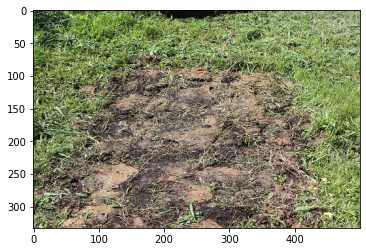

In [49]:
im,title, text = next(dset)
plt.imshow(im)
print(text)

# Debugging Counts

In [7]:
my_shards = ["/mnt/cfs/datasets/yfcc100m_clip_subset/data/70f.tar",
            "/mnt/cfs/datasets/yfcc100m_clip_subset/data/7b5.tar",
            "/mnt/cfs/datasets/yfcc100m_clip_subset/data/d2b.tar",
            "/mnt/cfs/datasets/yfcc100m_clip_subset/data/f6c.tar",
            "/mnt/cfs/datasets/yfcc100m_clip_subset/data/9a8.tar",
            "/mnt/cfs/datasets/yfcc100m_clip_subset/data/669.tar",
            "/mnt/cfs/datasets/yfcc100m_clip_subset/data/208.tar",
            "/mnt/cfs/datasets/yfcc100m_clip_subset/data/3d4.tar",
            "/mnt/cfs/datasets/yfcc100m_clip_subset/data/eab.tar",
            "/mnt/cfs/datasets/yfcc100m_clip_subset/data/86c.tar",
            "/mnt/cfs/datasets/yfcc100m_clip_subset/data/c2f.tar",
            "/mnt/cfs/datasets/yfcc100m_clip_subset/data/31e.tar",
            "/mnt/cfs/datasets/yfcc100m_clip_subset/data/ddd.tar",
            "/mnt/cfs/datasets/yfcc100m_clip_subset/data/41a.tar",
            "/mnt/cfs/datasets/yfcc100m_clip_subset/data/c63.tar",
            "/mnt/cfs/datasets/yfcc100m_clip_subset/data/826.tar",
            "/mnt/cfs/datasets/yfcc100m_clip_subset/data/d8a.tar",
            "/mnt/cfs/datasets/yfcc100m_clip_subset/data/77d.tar",
            "/mnt/cfs/datasets/yfcc100m_clip_subset/data/454.tar",
            "/mnt/cfs/datasets/yfcc100m_clip_subset/data/d15.tar",
            "/mnt/cfs/datasets/yfcc100m_clip_subset/data/4c2.tar",
            "/mnt/cfs/datasets/yfcc100m_clip_subset/data/ee9.tar",
            "/mnt/cfs/datasets/yfcc100m_clip_subset/data/792.tar",
            "/mnt/cfs/datasets/yfcc100m_clip_subset/data/7ab.tar",
            "/mnt/cfs/datasets/yfcc100m_clip_subset/data/46c.tar",
            "/mnt/cfs/datasets/yfcc100m_clip_subset/data/5a8.tar",
            "/mnt/cfs/datasets/yfcc100m_clip_subset/data/485.tar",
            "/mnt/cfs/datasets/yfcc100m_clip_subset/data/743.tar",
            "/mnt/cfs/datasets/yfcc100m_clip_subset/data/c5d.tar",
            "/mnt/cfs/datasets/yfcc100m_clip_subset/data/c8e.tar",
            "/mnt/cfs/datasets/yfcc100m_clip_subset/data/b49.tar",
            "/mnt/cfs/datasets/yfcc100m_clip_subset/data/dcf.tar",
            "/mnt/cfs/datasets/yfcc100m_clip_subset/data/0af.tar",
            "/mnt/cfs/datasets/yfcc100m_clip_subset/data/426.tar",
            "/mnt/cfs/datasets/yfcc100m_clip_subset/data/ccb.tar",
            "/mnt/cfs/datasets/yfcc100m_clip_subset/data/3c6.tar",
            "/mnt/cfs/datasets/yfcc100m_clip_subset/data/d67.tar",
            "/mnt/cfs/datasets/yfcc100m_clip_subset/data/854.tar"]

actual_counts = [3821, 4162, 4197, 4144, 4087, 4119, 3833, 4188, 4245, 4066, 4049, 4154, 4074, 3945, 4118, 4135, 4101, 4101, 4063, 4078, 4044, 4071, 4115, 4135, 3994, 4212, 4148, 4133, 3991, 4070, 4097, 4127, 230, 4112, 4115, 4114, 4036, 4036]

In [8]:
def count_shard(shard): 
    count = 0
    for _ in shard: 
        count += 1 
    return count

In [9]:
for idx, s in enumerate(my_shards): 
    shard = wds.WebDataset(s)
    ct = count_shard(shard)
    print(s, ct)
    if ct != actual_counts[idx]: 
        raise Exception(f"{s}: actual counts is {actual_counts[idx]}, you have {ct}")

/mnt/cfs/datasets/yfcc100m_clip_subset/data/70f.tar 3821
/mnt/cfs/datasets/yfcc100m_clip_subset/data/7b5.tar 4162
/mnt/cfs/datasets/yfcc100m_clip_subset/data/d2b.tar 4197
/mnt/cfs/datasets/yfcc100m_clip_subset/data/f6c.tar 4144
/mnt/cfs/datasets/yfcc100m_clip_subset/data/9a8.tar 4087
/mnt/cfs/datasets/yfcc100m_clip_subset/data/669.tar 4119
/mnt/cfs/datasets/yfcc100m_clip_subset/data/208.tar 3833
/mnt/cfs/datasets/yfcc100m_clip_subset/data/3d4.tar 4188
/mnt/cfs/datasets/yfcc100m_clip_subset/data/eab.tar 4245
/mnt/cfs/datasets/yfcc100m_clip_subset/data/86c.tar 4066
/mnt/cfs/datasets/yfcc100m_clip_subset/data/c2f.tar 4049
/mnt/cfs/datasets/yfcc100m_clip_subset/data/31e.tar 4154
/mnt/cfs/datasets/yfcc100m_clip_subset/data/ddd.tar 4074
/mnt/cfs/datasets/yfcc100m_clip_subset/data/41a.tar 3945
/mnt/cfs/datasets/yfcc100m_clip_subset/data/c63.tar 4118
/mnt/cfs/datasets/yfcc100m_clip_subset/data/826.tar 4135
/mnt/cfs/datasets/yfcc100m_clip_subset/data/d8a.tar 4101
/mnt/cfs/datasets/yfcc100m_clip

# Look at ffcv

In [3]:
loader = Loader('/mnt/cfs/datasets/yfcc100m_out/yfcc_clip.beton',
                batch_size=1,
                num_workers=2,
                pipelines={
                  'image': PipelineSpec('image', 
                                        CenterCropRGBImageDecoder((224, 224), 1.0),
                                        [ToTensor()]),
                  'text': PipelineSpec('text', 
                                        NDArrayDecoder(), [])
                })

In [4]:
dset = iter(loader)


A Week in Tokyo 57 Loyalty cards are part of daily life in Japan. This card here is filled with stamps meaning 500 yen off my next purchase at Saboten. By Danny Choo - www.dannychoo.com/profile/eng/ View more at www.dannychoo.com/post/en/25739/A Week in Tokyo 57.html a week in tokyo, dannychoo.com


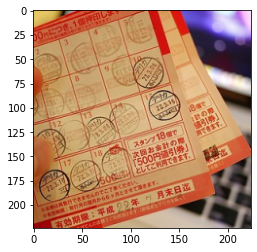

In [73]:
im, metadatas = next(dset)
metadata = metadatas[0]
#print(metadata)
idx = metadata.argmin()
text = metadata[:idx].tobytes()
plt.figure()
plt.imshow(im[0])
print(text.decode('utf-8'))


In [72]:
len(loader) # this is the length of the loader 

14824987

In [18]:
! cat /mnt/cfs/datasets/yfcc100m_clip_subset/yfcc100m_subset_data.tsv | wc -l # actual length of the dataset

14829396


In [19]:
14824987 / 14829396

0.9997026851262182